Integration value: 	1.71828182855
Analytic value: 	1.71828182846
Error: 5.556E-11
Square wave constant:  0.0
Square wave even coeffcients:  [0.026666666666666533, -1.0066022089934755e-16, 0.02666666666666644, 4.440892098500627e-17, 0.02666666666666656, 1.7467508920769134e-16, 0.026666666666666682, -2.5757174171303635e-16, 0.026666666666666675, 1.1842378929335004e-17]
Square wave odd coeffcients:  [1.2732396550315361, -1.2517583336269249e-17, 0.424416170818616, 1.0671129891631344e-16, 0.2546618531246621, 1.7079910427917997e-16, 0.18193006627375777, 2.0602111100179252e-16, 0.14155459448986124, 3.345018517929181e-16]


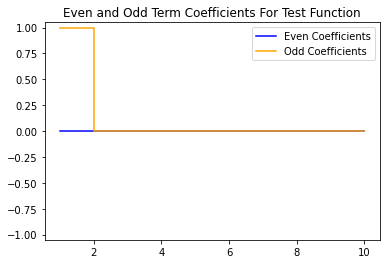

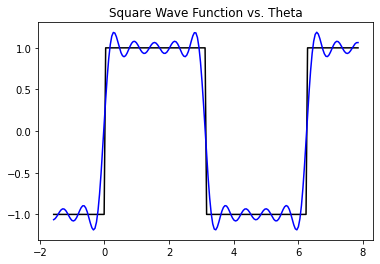

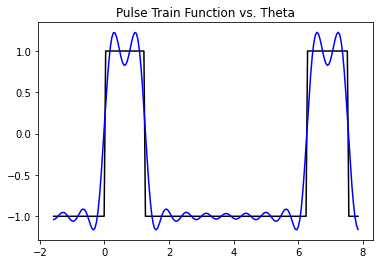

In [1]:
import matplotlib.pylab as plt
import math
import numpy as np

n = 100 # number of points to calculate the integral (50 integration elements may be sufficient)
alpha = 5 # The fraction of time the pulse wave period is in the high-state. High time = T/alpha
k_max = 10 # Number of coefficients to be calculated (set up to 10 coefficients for now)
omega = 1 # Wave frequency 
T = (2*math.pi)/omega # Wave period
int_flag = True # Flag to print a test for a simpson integration
a = 0 # Integration lower bound
b = T # Integration upper bound

# Define a list of Fourier coefficients to compare calculated values to known values
# The a-list represents cos-terms and the b-list represents sin-terms
# The a-list can be read as a_i*cos((i+1) * w * t). That is, each value of the list is the coefficient to the i+1 harmonic.
a_manual_list = [0, 0, 0]
b_manual_list = [1, 0, 0, 0, 0]


# Example exponential function
def f(x):
  # remember: functions need a return.
  return np.exp(x)


def simpson(fun, a = a, b = b, n = n):
  '''
  Compute the integral of a function on the bounds a to b using Simpsons method.
  n defines the number of divisions to calculate between a and b.
  '''
  h = (b-a)/float(n)
  
  x0 = a
  xn = b
  
  y0 = fun(x0)
  yn = fun(xn)
  
  # sum over even indexes of x and sum over odd indexes of x
  feven = 0.0
  fodd = 0.0
  
  for j in range(2,n,2):
      #print(j)
      xeven = a + j*h
      feven += fun(xeven)
      
      xodd = a + (j-1)*h
      fodd += fun(xodd)
      
  # range method above does not include the last odd term
  xodd = a + (n-1)*h
  fodd += fun(xodd)
  
  intfun = h*(y0 + 2.0*feven + 4.0*fodd + yn)/3.0
  
  return intfun
    
# define the function that will be expanded in terms of Fourier series
def fourier(a_0, a_list, b_list, t):
  '''
  Compute the value of a given Fourier series at time t
  '''
  a_term = 0
  for j in range(len(a_list)):
    a_term = a_term + a_list[j] * np.cos((j+1)*omega*t)
  
  b_term = 0
  for j in range(len(b_list)):
    b_term = b_term + b_list[j] * np.sin((j+1)*omega*t)
  
  return a_0 + a_term + b_term

def function(t):
  '''
  Computer the fourier series of the manually-defined terms
  '''
  return fourier(0, a_manual_list, b_manual_list, t)

def square_function(t):
  '''
  Square wave with period T
  '''
  t %= T
  theta = omega * t
  if 0 <= theta <= np.pi:
    return 1
  elif np.pi < theta <= 2*np.pi:
    return -1

def pulse_train(t):
  '''
  Pulse wave with period T. Starts high and alternates at time t = T/alpha every period.
  '''
  t %= T
  theta = omega * t
  omegatau = (2*math.pi)/alpha

  if 0 <= (theta) <= (omegatau):
    return 1
    
  if omegatau <= theta <= (2*math.pi):
    return -1

# define functions that will calculate all other coefficients
def fak(func):
  '''
  Calculate all even-term Fourier coefficients and return them in a list.
  Assumes a list of k-values has been pre-defined.
  '''
  a_list = []
  for k in k_list:
    func_a = lambda t: func(t) * np.cos(k*omega*t)
    a_list.append((2/T) * simpson(func_a, a, b, n))
  return a_list

def fbk(func):
  '''
  Calculate all odd-term Fourier coefficients and return them in a list.
  Assumes a list of k-values has been pre-defined.
  '''
  b_list = []
  for k in k_list:
    func_b = lambda t: func(t) * np.sin(k*omega*t)
    b_list.append((2/T) * simpson(func_b, a, b, n))
  return b_list

# Print the test comparison of simpsons rule and the analytical solution
if int_flag:
  # Integration test using a = 0, b = 1, and n = 50
  Int_simp = simpson(f, 0.0, 1.0, 100)
  Int_analytical = math.exp(1.0) - 1.0
  error = abs((Int_analytical - Int_simp) / Int_analytical)
  print("Integration value: \t%.11f\nAnalytic value: \t%.11f\nError: %.3E" % (Int_simp, Int_analytical, error))

# Initiate a list that will store all Fourier coeffcient indecies (k=1 and k>0).
k_list = []
for i in range(1, k_max + 1): 
  k_list.append(i)

  
# All functions defined above are 'idle'. We are now going to loop over the coefficients components
# to calculate all other coefficients from k=1 up to k=nc. Just use a simple for-loop for that.
# for-loop over number of coefficients

# After the loop is completed and new coefficients are appended on the lists, 
# add plot instructions that will make a graphic for a_k and b_k versus k in the same panel.


# Lists of coefficients for all even and odd terms in each list
a0_test = simpson(function, a, b, n) / T
a_test_list = fak(function)
b_test_list = fbk(function)

a0_square = simpson(square_function, a, b, n) / T
a_square_list = fak(square_function)
b_square_list = fbk(square_function)

a0_pulse = simpson(pulse_train, a, b, n) / T
a_pulse_list = fak(pulse_train)
b_pulse_list = fbk(pulse_train)
 
# Find the absolute maximum coefficient for the test
test_max = 0

for a in a_test_list:
  if abs(a) > test_max:
    test_max = abs(a)

for b in b_test_list:
  if abs(b) > test_max:
    test_max = abs(b)

test_max *= 1.05 # Make the graph boundaries be 5% past the maximum 


plt.figure() # Create a new plot for each function

# Plot the a and b values for each index
plt.step(k_list, a_test_list, c='blue', where='post', label="Even Coefficients")
plt.step(k_list, b_test_list, c='orange', where='post', label="Odd Coefficients")
plt.ylim(-test_max, test_max)
plt.title("Even and Odd Term Coefficients For Test Function")
plt.legend()

t_list = np.linspace(-T/4, 5*T/4, 200)
theta_list = t_list * omega

# Reconstruct the wave from the calculated fourier coeficients 
square_reconstructed = []
pulse_reconstructed = []
for t in t_list:
  square_reconstructed.append(fourier(a0_square, a_square_list, b_square_list, t))
  pulse_reconstructed.append(fourier(a0_pulse, a_pulse_list, b_pulse_list, t))

plt.figure() # Create a new plot
plt.plot(theta_list, [square_function(t) for t in t_list], c='black')
plt.plot(theta_list, square_reconstructed, c='blue')
plt.title("Square Wave Function vs. Theta")

print("Square wave constant: ", a0_square)
print("Square wave even coeffcients: ", a_square_list)
print("Square wave odd coeffcients: ", b_square_list)

plt.figure() # Create a new plot
plt.plot(theta_list, [pulse_train(t) for t in t_list], c='black')
plt.plot(theta_list, pulse_reconstructed, c='blue')
plt.title("Pulse Train Function vs. Theta")


plt.show()
